In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
import time
import datetime
import geocoder
pd.set_option('display.max_rows',500)
pd.set_option('display.max_columns',50)
pd.set_option('max_colwidth',200)
%matplotlib inline
import seaborn as sns

# 高新區數量畫圖

In [ ]:
d = pd.read_excel(r'C:\Users\User\Dropbox\paper\科技園區\China\高新技術開發區名單.xlsx')
d.groupby('國家級高新區成立時間')['Zone Name(中文)'].count()

In [ ]:
from matplotlib.font_manager import FontProperties
myfont = FontProperties(fname=r'C:\Windows\Fonts\msjhbd.ttc')
fig = plt.figure(figsize = (5,3))
ax1 = fig.add_subplot(111)
ax1.set_ylabel('核准數',fontproperties=myfont)
bar1 = ax1.bar(d.groupby('國家級高新區成立時間')['Zone Name(中文)'].count().index,
               d.groupby('國家級高新區成立時間')['Zone Name(中文)'].count(),
               alpha=0.7,width=1,color='r')
ax1.set_xlim([1990,2020])
plt.title('國家級高新技術產業開發區 核准數',fontproperties=myfont,fontsize=15)

# 專利繪圖

In [2]:
patent_df = pd.read_excel(r'E:\paper\專利資料_matching對象.xlsx',index_col=0)
patent_df['縣碼'] = patent_df['縣碼'].astype(str)

In [4]:
final_6 = pd.read_excel(r'E:\paper\新迴歸_6碼.xlsx')

In [9]:
treat = list(final_6[final_6['2010園區']==1]['縣碼'].unique().astype(str))
control = list(final_6[final_6['2010園區']==0]['縣碼'].unique().astype(str))

In [11]:
patent_treat = patent_df[patent_df['縣碼'].isin(treat)]
patent_untreat = patent_df[patent_df['縣碼'].isin(control)]

In [13]:
patent_df

,縣碼,year,總專利數,總引用數,patent stock,cite,cite stock,log patent stock,log cite stock,patent stock growth,cite stock growth
0,130203,1985,2,0,2.000000,0.000000,0.000000,1.098612,0.000000,0.000000,0.000000
1,130203,1986,3,0,4.700000,0.000000,0.000000,1.740466,0.000000,0.805970,0.000000
2,130203,1987,4,1,7.995000,1.000000,0.125078,2.196669,0.117853,0.519102,2.000000
3,130203,1988,7,3,13.795750,3.850000,0.279071,2.694340,0.246134,0.532405,0.762061
4,130203,1989,5,30,16.726388,33.272500,1.989222,2.875054,1.095013,0.192034,1.507874
...,...,...,...,...,...,...,...,...,...,...,...
3498,652301,2011,62,62,166.804612,213.646468,1.280819,5.122800,0.824534,0.299927,-0.121804
3499,652301,2012,105,68,246.783920,249.599498,1.011409,5.512557,0.698836,0.386758,-0.235064
3500,652301,2013,103,76,312.766332,288.159573,0.921325,5.748649,0.653015,0.235841,-0.093219
3501,652301,2014,127,33,392.851382,277.935637,0.707483,5.975974,0.535020,0.226993,-0.262575


In [14]:
# patent stock
patent_stock_treat = patent_treat.groupby('year')['log patent stock'].mean()
patent_stock_untreat = patent_untreat.groupby('year')['log patent stock'].mean()

Text(0.5, 1.0, 'Log Patent Stock')

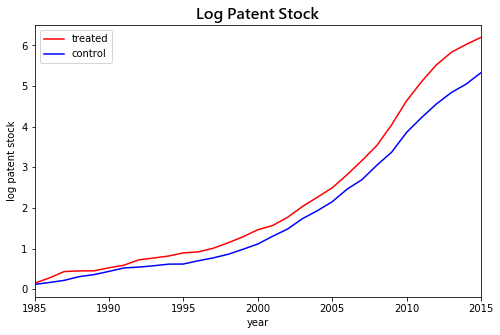

In [25]:
from matplotlib.font_manager import FontProperties
myfont = FontProperties(fname=r'C:\Windows\Fonts\msjhbd.ttc')
fig = plt.figure(figsize = (8,5))
ax1 = fig.add_subplot(111)
ax1.set_ylabel('log patent stock')
ax1.set_xlabel('year')

plt.xlim(1985, 2015)
plt.plot(patent_stock_treat.index, 
         patent_stock_treat,
         color='red', label='treated')
plt.plot(patent_stock_untreat.index,
         patent_stock_untreat,
         color='blue', label='control')
plt.legend(loc=2)

plt.title('Log Patent Stock',fontproperties=myfont,fontsize=15)

Text(0.5, 1.0, 'Log Patent Stock')

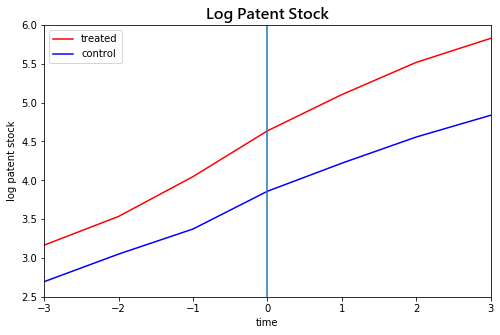

In [22]:
from matplotlib.font_manager import FontProperties
myfont = FontProperties(fname=r'C:\Windows\Fonts\msjhbd.ttc')
fig = plt.figure(figsize = (8,5))
ax1 = fig.add_subplot(111)
ax1.set_ylabel('log patent stock')
ax1.set_xlabel('time')

plt.xlim(-3,3)
plt.ylim(2.5,6)
plt.plot(patent_stock_treat.index-2010, 
         patent_stock_treat,
         color='red', label='treated')
plt.plot(patent_stock_untreat.index-2010,
         patent_stock_untreat,
         color='blue', label='control')
plt.axvline(x=0)
plt.legend(loc=2)

plt.title('Log Patent Stock',fontproperties=myfont,fontsize=15)

In [23]:
# cite stock
cite_stock_treat = patent_treat.groupby('year')['log cite stock'].mean()
cite_stock_untreat = patent_untreat.groupby('year')['log cite stock'].mean()

Text(0.5, 1.0, 'Log Citation Stock')

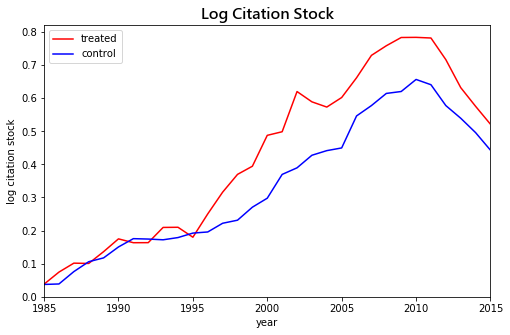

In [26]:
from matplotlib.font_manager import FontProperties
myfont = FontProperties(fname=r'C:\Windows\Fonts\msjhbd.ttc')
fig = plt.figure(figsize = (8,5))
ax1 = fig.add_subplot(111)
ax1.set_ylabel('log citation stock')
ax1.set_xlabel('year')

plt.xlim(1985, 2015)
plt.plot(cite_stock_treat.index, 
         cite_stock_treat,
         color='red', label='treated')
plt.plot(cite_stock_untreat.index,
         cite_stock_untreat,
         color='blue', label='control')
plt.legend(loc=2)

plt.title('Log Citation Stock',fontproperties=myfont,fontsize=15)

Text(0.5, 1.0, 'Log Citation Stock')

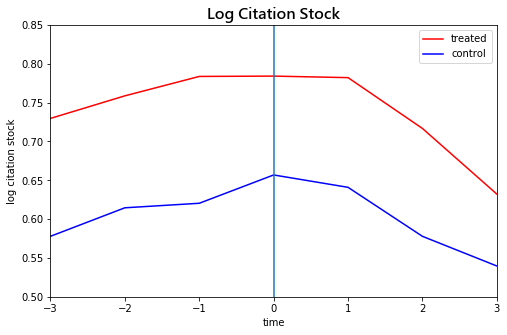

In [32]:
from matplotlib.font_manager import FontProperties
myfont = FontProperties(fname=r'C:\Windows\Fonts\msjhbd.ttc')
fig = plt.figure(figsize = (8,5))
ax1 = fig.add_subplot(111)
ax1.set_ylabel('log citation stock')
ax1.set_xlabel('time')

plt.xlim(-3,3)
plt.ylim(0.5,0.85)
plt.plot(cite_stock_treat.index-2010, 
         cite_stock_treat,
         color='red', label='treated')
plt.plot(cite_stock_untreat.index-2010,
         cite_stock_untreat,
         color='blue', label='control')
plt.axvline(x=0)
plt.legend(loc=1)

plt.title('Log Citation Stock',fontproperties=myfont,fontsize=15)

In [33]:
# patent stock growth
patent_stock_growth_treat = patent_treat.groupby('year')['patent stock growth'].mean()
patent_stock_growth_untreat = patent_untreat.groupby('year')['patent stock growth'].mean()

Text(0.5, 1.0, 'Patent Stock Growth')

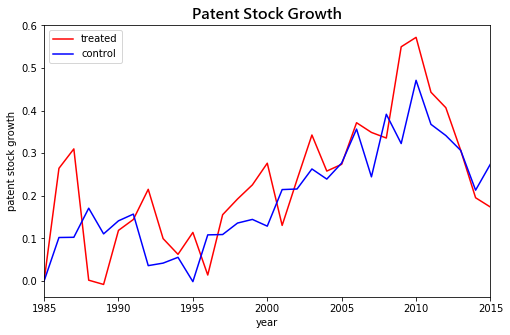

In [34]:
from matplotlib.font_manager import FontProperties
myfont = FontProperties(fname=r'C:\Windows\Fonts\msjhbd.ttc')
fig = plt.figure(figsize = (8,5))
ax1 = fig.add_subplot(111)
ax1.set_ylabel('patent stock growth')
ax1.set_xlabel('year')

plt.xlim(1985, 2015)
plt.plot(patent_stock_growth_treat.index, 
         patent_stock_growth_treat,
         color='red', label='treated')
plt.plot(patent_stock_growth_untreat.index,
         patent_stock_growth_untreat,
         color='blue', label='control')
plt.legend(loc=2)

plt.title('Patent Stock Growth',fontproperties=myfont,fontsize=15)

Text(0.5, 1.0, 'Patent Stock Growth')

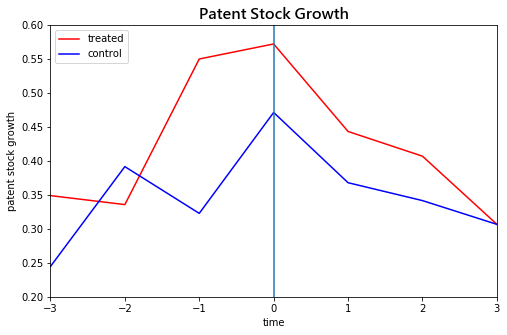

In [36]:
from matplotlib.font_manager import FontProperties
myfont = FontProperties(fname=r'C:\Windows\Fonts\msjhbd.ttc')
fig = plt.figure(figsize = (8,5))
ax1 = fig.add_subplot(111)
ax1.set_ylabel('patent stock growth')
ax1.set_xlabel('time')

plt.xlim(-3,3)
plt.ylim(0.2,0.6)
plt.plot(patent_stock_growth_treat.index-2010, 
         patent_stock_growth_treat,
         color='red', label='treated')
plt.plot(patent_stock_growth_untreat.index-2010,
         patent_stock_growth_untreat,
         color='blue', label='control')
plt.axvline(x=0)
plt.legend(loc=2)

plt.title('Patent Stock Growth',fontproperties=myfont,fontsize=15)

In [37]:
# citation stock growth
cite_stock_growth_treat = patent_treat.groupby('year')['cite stock growth'].mean()
cite_stock_growth_untreat = patent_untreat.groupby('year')['cite stock growth'].mean()

Text(0.5, 1.0, 'Citation Stock Growth')

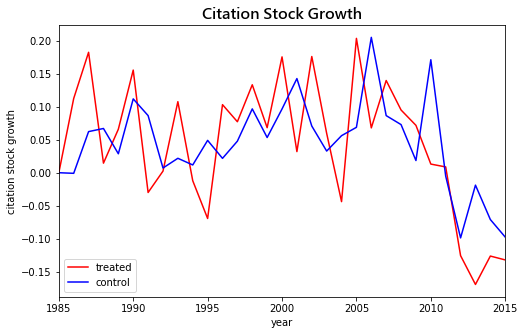

In [40]:
from matplotlib.font_manager import FontProperties
myfont = FontProperties(fname=r'C:\Windows\Fonts\msjhbd.ttc')
fig = plt.figure(figsize = (8,5))
ax1 = fig.add_subplot(111)
ax1.set_ylabel('citation stock growth')
ax1.set_xlabel('year')

plt.xlim(1985, 2015)
plt.plot(cite_stock_growth_treat.index, 
         cite_stock_growth_treat,
         color='red', label='treated')
plt.plot(cite_stock_growth_untreat.index,
         cite_stock_growth_untreat,
         color='blue', label='control')
plt.legend(loc=3)

plt.title('Citation Stock Growth',fontproperties=myfont,fontsize=15)

Text(0.5, 1.0, 'Citation Stock Growth')

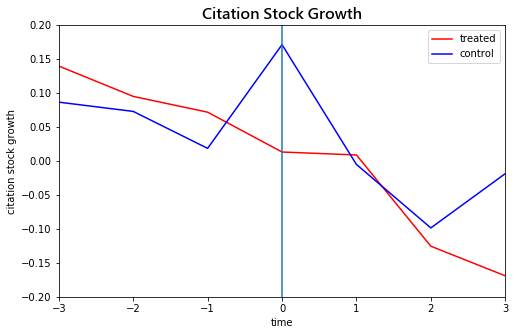

In [43]:
from matplotlib.font_manager import FontProperties
myfont = FontProperties(fname=r'C:\Windows\Fonts\msjhbd.ttc')
fig = plt.figure(figsize = (8,5))
ax1 = fig.add_subplot(111)
ax1.set_ylabel('citation stock growth')
ax1.set_xlabel('time')

plt.xlim(-3,3)
plt.ylim(-0.2,0.2)
plt.plot(cite_stock_growth_treat.index-2010, 
         cite_stock_growth_treat,
         color='red', label='treated')
plt.plot(cite_stock_growth_untreat.index-2010,
         cite_stock_growth_untreat,
         color='blue', label='control')
plt.axvline(x=0)
plt.legend(loc=1)

plt.title('Citation Stock Growth',fontproperties=myfont,fontsize=15)

# TFP繪圖

In [2]:
final_9 = pd.read_excel(r'E:\paper\matching完畢_全時間_9碼.xlsx',index_col=0)
final_6 = pd.read_excel(r'E:\paper\matching完畢_全時間_6碼.xlsx',index_col=0)

In [29]:
n9 = final_9
n6 = final_6

C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.
C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  


Text(0.5, 1.0, 'Log TFP(鄉鎮)')

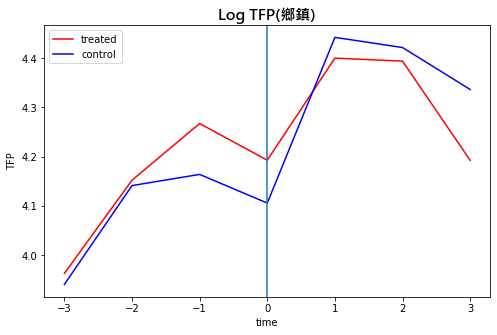

In [31]:
from matplotlib.font_manager import FontProperties
myfont = FontProperties(fname=r'C:\Windows\Fonts\msjhbd.ttc')
fig = plt.figure(figsize = (8,5))
ax1 = fig.add_subplot(111)
ax1.set_ylabel('TFP')
ax1.set_xlabel('time')
plt.plot(n9[n9.index.isin(n9[n9['2010園區']==1].index.unique())].groupby('時間點')['TFP'].mean().index, 
         n9[n9.index.isin(n9[n9['2010園區']==1].index.unique())].groupby('時間點')['TFP'].mean(),
         color='red', label='treated')
plt.plot(n9[~n9.index.isin(n9[n9['2010園區']==1].index.unique())].groupby('時間點')['TFP'].mean().index,
         n9[~n9.index.isin(n9[n9['2010園區']==1].index.unique())].groupby('時間點')['TFP'].mean(),
         color='blue', label='control')
plt.axvline(x=0)
plt.legend(loc=2)

plt.title('Log TFP(鄉鎮)',fontproperties=myfont,fontsize=15)

Text(0.5, 1.0, 'Log TFP(縣)')

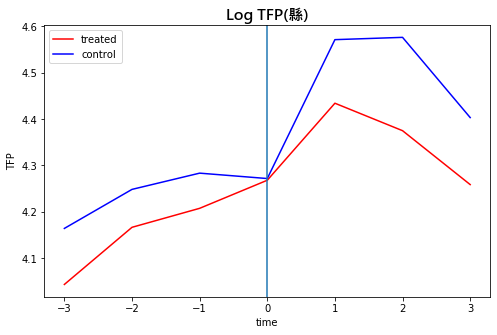

In [32]:
from matplotlib.font_manager import FontProperties
myfont = FontProperties(fname=r'C:\Windows\Fonts\msjhbd.ttc')
fig = plt.figure(figsize = (8,5))
ax1 = fig.add_subplot(111)
ax1.set_ylabel('TFP')
ax1.set_xlabel('time')
plt.plot(n6[n6.index.isin(n6[n6['2010園區']==1].index.unique())].groupby('時間點')['TFP'].mean().index, 
         n6[n6.index.isin(n6[n6['2010園區']==1].index.unique())].groupby('時間點')['TFP'].mean(),
         color='red', label='treated')
plt.plot(n6[~n6.index.isin(n6[n6['2010園區']==1].index.unique())].groupby('時間點')['TFP'].mean().index,
         n6[~n6.index.isin(n6[n6['2010園區']==1].index.unique())].groupby('時間點')['TFP'].mean(),
         color='blue', label='control')
plt.axvline(x=0)
plt.legend(loc=2)

plt.title('Log TFP(縣)',fontproperties=myfont,fontsize=15)

# TFP相關變數

In [ ]:
from matplotlib.font_manager import FontProperties
myfont = FontProperties(fname=r'C:\Windows\Fonts\msjhbd.ttc')
fig = plt.figure(figsize = (8,5))
ax1 = fig.add_subplot(111)
ax1.set_ylabel('Y')
ax1.set_xlabel('time')
plt.plot(n9[n9.index.isin(n9[n9['2010園區']==1].index.unique())].groupby('時間點')['工業產值'].mean().index, 
         n9[n9.index.isin(n9[n9['2010園區']==1].index.unique())].groupby('時間點')['工業產值'].mean(),
         color='red', label='treated')
plt.plot(n9[~n9.index.isin(n9[n9['2010園區']==1].index.unique())].groupby('時間點')['工業產值'].mean().index,
         n9[~n9.index.isin(n9[n9['2010園區']==1].index.unique())].groupby('時間點')['工業產值'].mean(),
         color='blue', label='untreated')
plt.axvline(x=0)
plt.legend(loc=2)

plt.title('工業產值(鄉鎮)',fontproperties=myfont,fontsize=15)

In [ ]:
from matplotlib.font_manager import FontProperties
myfont = FontProperties(fname=r'C:\Windows\Fonts\msjhbd.ttc')
fig = plt.figure(figsize = (8,5))
ax1 = fig.add_subplot(111)
ax1.set_ylabel('L')
ax1.set_xlabel('time')
plt.plot(n9[n9.index.isin(n9[n9['2010園區']==1].index.unique())].groupby('時間點')['員工數'].mean().index, 
         n9[n9.index.isin(n9[n9['2010園區']==1].index.unique())].groupby('時間點')['員工數'].mean(),
         color='red', label='treated')
plt.plot(n9[~n9.index.isin(n9[n9['2010園區']==1].index.unique())].groupby('時間點')['員工數'].mean().index,
         n9[~n9.index.isin(n9[n9['2010園區']==1].index.unique())].groupby('時間點')['員工數'].mean(),
         color='blue', label='untreated')
plt.axvline(x=0)
plt.legend(loc=2)

plt.title('員工數(鄉鎮)',fontproperties=myfont,fontsize=15)

In [ ]:
from matplotlib.font_manager import FontProperties
myfont = FontProperties(fname=r'C:\Windows\Fonts\msjhbd.ttc')
fig = plt.figure(figsize = (8,5))
ax1 = fig.add_subplot(111)
ax1.set_ylabel('K')
ax1.set_xlabel('time')
plt.plot(n9[n9.index.isin(n9[n9['2010園區']==1].index.unique())].groupby('時間點')['固定資產'].mean().index, 
         n9[n9.index.isin(n9[n9['2010園區']==1].index.unique())].groupby('時間點')['固定資產'].mean(),
         color='red', label='treated')
plt.plot(n9[~n9.index.isin(n9[n9['2010園區']==1].index.unique())].groupby('時間點')['固定資產'].mean().index,
         n9[~n9.index.isin(n9[n9['2010園區']==1].index.unique())].groupby('時間點')['固定資產'].mean(),
         color='blue', label='untreated')
plt.axvline(x=0)
plt.legend(loc=2)

plt.title('固定資產(鄉鎮)',fontproperties=myfont,fontsize=15)

In [ ]:
from matplotlib.font_manager import FontProperties
myfont = FontProperties(fname=r'C:\Windows\Fonts\msjhbd.ttc')
fig = plt.figure(figsize = (8,5))
ax1 = fig.add_subplot(111)
ax1.set_ylabel('Y')
ax1.set_xlabel('time')
plt.plot(n6[n6.index.isin(n6[n6['2010園區']==1].index.unique())].groupby('時間點')['工業產值'].mean().index, 
         n6[n6.index.isin(n6[n6['2010園區']==1].index.unique())].groupby('時間點')['工業產值'].mean(),
         color='red', label='treated')
plt.plot(n6[~n6.index.isin(n6[n6['2010園區']==1].index.unique())].groupby('時間點')['工業產值'].mean().index,
         n6[~n6.index.isin(n6[n6['2010園區']==1].index.unique())].groupby('時間點')['工業產值'].mean(),
         color='blue', label='untreated')
plt.axvline(x=0)
plt.legend(loc=2)

plt.title('工業產值(縣)',fontproperties=myfont,fontsize=15)

In [ ]:
from matplotlib.font_manager import FontProperties
myfont = FontProperties(fname=r'C:\Windows\Fonts\msjhbd.ttc')
fig = plt.figure(figsize = (8,5))
ax1 = fig.add_subplot(111)
ax1.set_ylabel('L')
ax1.set_xlabel('time')
plt.plot(n6[n6.index.isin(n6[n6['2010園區']==1].index.unique())].groupby('時間點')['員工數'].mean().index, 
         n6[n6.index.isin(n6[n6['2010園區']==1].index.unique())].groupby('時間點')['員工數'].mean(),
         color='red', label='treated')
plt.plot(n6[~n6.index.isin(n6[n6['2010園區']==1].index.unique())].groupby('時間點')['員工數'].mean().index,
         n6[~n6.index.isin(n6[n6['2010園區']==1].index.unique())].groupby('時間點')['員工數'].mean(),
         color='blue', label='untreated')
plt.axvline(x=0)
plt.legend(loc=2)

plt.title('員工數(縣)',fontproperties=myfont,fontsize=15)

In [ ]:
from matplotlib.font_manager import FontProperties
myfont = FontProperties(fname=r'C:\Windows\Fonts\msjhbd.ttc')
fig = plt.figure(figsize = (8,5))
ax1 = fig.add_subplot(111)
ax1.set_ylabel('K')
ax1.set_xlabel('time')
plt.plot(n6[n6.index.isin(n6[n6['2010園區']==1].index.unique())].groupby('時間點')['固定資產'].mean().index, 
         n6[n6.index.isin(n6[n6['2010園區']==1].index.unique())].groupby('時間點')['固定資產'].mean(),
         color='red', label='treated')
plt.plot(n6[~n6.index.isin(n6[n6['2010園區']==1].index.unique())].groupby('時間點')['固定資產'].mean().index,
         n6[~n6.index.isin(n6[n6['2010園區']==1].index.unique())].groupby('時間點')['固定資產'].mean(),
         color='blue', label='untreated')
plt.axvline(x=0)
plt.legend(loc=2)

plt.title('固定資產(縣)',fontproperties=myfont,fontsize=15)

# 配對vs未配對

In [ ]:
NN_9 = pd.read_excel(r'E:\paper\matching結果TFP_9碼.xlsx')
NN_6 = pd.read_excel(r'E:\paper\matching結果TFP_6碼.xlsx')

In [ ]:
NN9 = []
for i in NN_9[NN_9['2010園區']==1].index:
    NN9.append([i+1] + list(NN_9.loc[i,['nearest-neighbor index 1','nearest-neighbor index 2','nearest-neighbor index 3']]))
NN9_code = []
for i in NN9:
    temp = []
    for j in i:
        temp.append(NN_9.loc[int(j)-1,'鄉鎮碼'])
    NN9_code.append(temp)
NN_9_sample = []
for i in NN9_code:
    for j in i:
        NN_9_sample.append(str(j))

In [ ]:
NN6 = []
for i in NN_6[NN_6['2010園區']==1].index:
    NN6.append([i+1] + list(NN_6.loc[i,['nearest-neighbor index 1','nearest-neighbor index 2','nearest-neighbor index 3']]))
NN6_code = []
for i in NN6:
    temp = []
    for j in i:
        temp.append(NN_6.loc[int(j)-1,'縣碼'])
    NN6_code.append(temp)
NN_6_sample = []
for i in NN6_code:
    for j in i:
        NN_6_sample.append(str(j))

In [ ]:
TFP_9_DD = pd.read_excel(r'E:\paper\panel_data_9碼_可用樣本.xlsx',index_col=0)
TFP_6_DD = pd.read_excel(r'E:\paper\panel_data_6碼_可用樣本.xlsx',index_col=0)

### capital labor ratio

In [ ]:
TFP_9_DD['clratio'] = TFP_9_DD.apply(lambda x:x['固定資產']/x['員工數'],axis=1)
TFP_6_DD['clratio'] = TFP_6_DD.apply(lambda x:x['固定資產']/x['員工數'],axis=1)

In [ ]:
t_unt9 = []
t_unm9 = []
for i in NN9_code:
    for k in [2007,2008,2009,2010,2011,2012,2013]:
        sample = TFP_9_DD[TFP_9_DD['year']==k]
        t_unt9.append((k,sample.loc[i[0],'clratio'] - sample.loc[i[1],'clratio']))
        t_unt9.append((k,sample.loc[i[0],'clratio'] - sample.loc[i[2],'clratio']))
        t_unt9.append((k,sample.loc[i[0],'clratio'] - sample.loc[i[3],'clratio']))
        for x in sample[~sample.index.isin(i)].index:
            t_unm9.append((k,sample.loc[i[0],'clratio'] - sample.loc[x,'clratio']))
print(len(t_unt9),len(t_unm9))

In [ ]:
#內插異常值
TFP_6_DD = pd.read_excel(r'E:\paper\panel_data_6碼_可用樣本.xlsx')
TFP_6_DD['clratio'] = TFP_6_DD.apply(lambda x:x['固定資產']/x['員工數'],axis=1)
TFP_6_DD.loc[10146,'clratio'] = 7498.170096
TFP_6_DD = TFP_6_DD.set_index('縣碼')

In [ ]:
n9_unt = pd.DataFrame({'year':[i[0] for i in t_unt9],'clratio':[i[1] for i in t_unt9]})
n9_unt['year']-=2010
n9_unm = pd.DataFrame({'year':[i[0] for i in t_unm9],'clratio':[i[1] for i in t_unm9]})
n9_unm['year']-=2010

In [ ]:
from matplotlib.font_manager import FontProperties
myfont = FontProperties(fname=r'C:\Windows\Fonts\msjhbd.ttc')
fig = plt.figure(figsize = (8,5))
ax1 = fig.add_subplot(111)
ax1.set_ylabel('clratio')
ax1.set_xlabel('time')
plt.plot(n9_unt.groupby('year')['clratio'].mean().index, 
         n9_unt.groupby('year')['clratio'].mean(),
         color='red', label='treat-control')
plt.plot(n9_unt.groupby('year')['clratio'].median().index, 
         n9_unt.groupby('year')['clratio'].median(),
         color='red',ls='--')

plt.plot(n9_unm.groupby('year')['clratio'].mean().index,
         n9_unm.groupby('year')['clratio'].mean(),
         color='blue', label='treat-unmatch')
plt.plot(n9_unm.groupby('year')['clratio'].median().index, 
         n9_unm.groupby('year')['clratio'].median(),
         color='blue',ls='--')

plt.axvline(x=0)
plt.legend(loc=3)

plt.title('Capital labor ratio(鄉鎮)',fontproperties=myfont,fontsize=15)

In [ ]:
t_unt6 = []
t_unm6 = []
for i in NN6_code:
    for k in [2007,2008,2009,2010,2011,2012,2013]:
        sample = TFP_6_DD[TFP_6_DD['year']==k]
        t_unt6.append((k,sample.loc[i[0],'clratio'] - sample.loc[i[1],'clratio']))
        t_unt6.append((k,sample.loc[i[0],'clratio'] - sample.loc[i[2],'clratio']))
        t_unt6.append((k,sample.loc[i[0],'clratio'] - sample.loc[i[3],'clratio']))
        for x in sample[~sample.index.isin(i)].index:
            t_unm6.append((k,sample.loc[i[0],'clratio'] - sample.loc[x,'clratio']))
print(len(t_unt6),len(t_unm6))

In [ ]:
n6_unt = pd.DataFrame({'year':[i[0] for i in t_unt6],'clratio':[i[1] for i in t_unt6]})
n6_unt['year']-=2010
n6_unm = pd.DataFrame({'year':[i[0] for i in t_unm6],'clratio':[i[1] for i in t_unm6]})
n6_unm['year']-=2010

In [ ]:
from matplotlib.font_manager import FontProperties
myfont = FontProperties(fname=r'C:\Windows\Fonts\msjhbd.ttc')
fig = plt.figure(figsize = (8,5))
ax1 = fig.add_subplot(111)
ax1.set_ylabel('clratio')
ax1.set_xlabel('time')

plt.plot(n6_unt.groupby('year')['clratio'].mean().index, 
         n6_unt.groupby('year')['clratio'].mean(),
         color='red', label='treat-control')
plt.plot(n6_unt.groupby('year')['clratio'].median().index, 
         n6_unt.groupby('year')['clratio'].median(),
         color='red',ls='--')

plt.plot(n6_unm.groupby('year')['clratio'].mean().index,
         n6_unm.groupby('year')['clratio'].mean(),
         color='blue', label='treat-unmatch')
plt.plot(n6_unm.groupby('year')['clratio'].median().index, 
         n6_unm.groupby('year')['clratio'].median(),
         color='blue',ls='--')

plt.axvline(x=0)
plt.legend(loc=1)

plt.title('Capital labor ratio(縣)',fontproperties=myfont,fontsize=15)

### 平均薪資&labor cost share

In [ ]:
salary_2007_9 = firm_2007.groupby('鄉鎮碼')[['本年应付工资总额(贷方累计发生额)','全部从业人员年平均人数','主营业务成本']].sum()
salary_2007_6 = firm_2007.groupby('縣碼')[['本年应付工资总额(贷方累计发生额)','全部从业人员年平均人数','主营业务成本']].sum()

salary_2008_9 = firm_2008.groupby('鄉鎮碼')[['本年应付工资总额(贷方累计发生额)','全部从业人员年平均人数','主营业务成本']].sum()
salary_2008_6 = firm_2008.groupby('縣碼')[['本年应付工资总额(贷方累计发生额)','全部从业人员年平均人数','主营业务成本']].sum()

salary_2011_9 = firm_2011.groupby('鄉鎮碼')[['应付职工薪酬','从业人数','主营业务成本']].sum()
salary_2011_6 = firm_2011.groupby('縣碼')[['应付职工薪酬','从业人数','主营业务成本']].sum()

salary_2012_9 = firm_2012.groupby('鄉鎮碼')[['应付职工薪酬_本年贷方累计发生额_','_从业人数','其中：主营业务成本']].sum()
salary_2012_6 = firm_2012.groupby('縣碼')[['应付职工薪酬_本年贷方累计发生额_','_从业人数','其中：主营业务成本']].sum()

salary_2013_9 = firm_2013.groupby('鄉鎮碼')[['应付职工薪酬','_从业人数','主营业务成本']].sum()
salary_2013_6 = firm_2013.groupby('縣碼')[['应付职工薪酬','_从业人数','主营业务成本']].sum()

In [ ]:
salary_2007_9['salary'] = salary_2007_9.apply(lambda x:x['本年应付工资总额(贷方累计发生额)']/x['全部从业人员年平均人数'],axis=1)
salary_2007_9['labor cost'] = salary_2007_9.apply(lambda x:x['本年应付工资总额(贷方累计发生额)']/x['主营业务成本'],axis=1)
salary_2007_6['salary'] = salary_2007_6.apply(lambda x:x['本年应付工资总额(贷方累计发生额)']/x['全部从业人员年平均人数'],axis=1)
salary_2007_6['labor cost'] = salary_2007_6.apply(lambda x:x['本年应付工资总额(贷方累计发生额)']/x['主营业务成本'],axis=1)

salary_2008_9['salary'] = salary_2008_9.apply(lambda x:x['本年应付工资总额(贷方累计发生额)']/x['全部从业人员年平均人数'],axis=1)
salary_2008_9['labor cost'] = salary_2008_9.apply(lambda x:x['本年应付工资总额(贷方累计发生额)']/x['主营业务成本'],axis=1)
salary_2008_6['salary'] = salary_2008_6.apply(lambda x:x['本年应付工资总额(贷方累计发生额)']/x['全部从业人员年平均人数'],axis=1)
salary_2008_6['labor cost'] = salary_2008_6.apply(lambda x:x['本年应付工资总额(贷方累计发生额)']/x['主营业务成本'],axis=1)

salary_2011_9['salary'] = salary_2011_9.apply(lambda x:x['应付职工薪酬']/x['从业人数'],axis=1)
salary_2011_9['labor cost'] = salary_2011_9.apply(lambda x:x['应付职工薪酬']/x['主营业务成本'],axis=1)
salary_2011_6['salary'] = salary_2011_6.apply(lambda x:x['应付职工薪酬']/x['从业人数'],axis=1)
salary_2011_6['labor cost'] = salary_2011_6.apply(lambda x:x['应付职工薪酬']/x['主营业务成本'],axis=1)

salary_2012_9['salary'] = salary_2012_9.apply(lambda x:x['应付职工薪酬_本年贷方累计发生额_']/x['_从业人数'],axis=1)
salary_2012_9['labor cost'] = salary_2012_9.apply(lambda x:x['应付职工薪酬_本年贷方累计发生额_']/x['其中：主营业务成本'],axis=1)
salary_2012_6['salary'] = salary_2012_6.apply(lambda x:x['应付职工薪酬_本年贷方累计发生额_']/x['_从业人数'],axis=1)
salary_2012_6['labor cost'] = salary_2012_6.apply(lambda x:x['应付职工薪酬_本年贷方累计发生额_']/x['其中：主营业务成本'],axis=1)

salary_2013_9['salary'] = salary_2013_9.apply(lambda x:x['应付职工薪酬']/x['_从业人数'],axis=1)
salary_2013_9['labor cost'] = salary_2013_9.apply(lambda x:x['应付职工薪酬']/x['主营业务成本'],axis=1)
salary_2013_6['salary'] = salary_2013_6.apply(lambda x:x['应付职工薪酬']/x['_从业人数'],axis=1)
salary_2013_6['labor cost'] = salary_2013_6.apply(lambda x:x['应付职工薪酬']/x['主营业务成本'],axis=1)

In [ ]:
salary_2007_9['year'] = 2007
salary_2007_6['year'] = 2007

salary_2008_9['year'] = 2008
salary_2008_6['year'] = 2008

salary_2011_9['year'] = 2011
salary_2011_6['year'] = 2011

salary_2012_9['year'] = 2012
salary_2012_6['year'] = 2012

salary_2013_9['year'] = 2013
salary_2013_6['year'] = 2013

In [ ]:
salary_2007_9['比對'] = salary_2007_9.index
salary_2007_6['比對'] = salary_2007_6.index

salary_2008_9['比對'] = salary_2008_9.index
salary_2008_6['比對'] = salary_2008_6.index

salary_2011_9['比對'] = salary_2011_9.index
salary_2011_6['比對'] = salary_2011_6.index

salary_2012_9['比對'] = salary_2012_9.index
salary_2012_6['比對'] = salary_2012_6.index

salary_2013_9['比對'] = salary_2013_9.index
salary_2013_6['比對'] = salary_2013_6.index

In [ ]:
salary_9 = pd.concat([salary_2007_9[['比對','salary','labor cost','year']],
                   salary_2008_9[['比對','salary','labor cost','year']],
                   salary_2011_9[['比對','salary','labor cost','year']],
                   salary_2012_9[['比對','salary','labor cost','year']],
                   salary_2013_9[['比對','salary','labor cost','year']]],
         ignore_index=True).sort_values(['比對','year'])

salary_6 = pd.concat([salary_2007_6[['比對','salary','labor cost','year']],
                   salary_2008_6[['比對','salary','labor cost','year']],
                   salary_2011_6[['比對','salary','labor cost','year']],
                   salary_2012_6[['比對','salary','labor cost','year']],
                   salary_2013_6[['比對','salary','labor cost','year']]],
         ignore_index=True).sort_values(['比對','year'])

In [ ]:
for i in np.arange(0,len(NN9_code)):
    for k in np.arange(0,len(NN9_code[i])):
        NN9_code[i][k] = NN9_code[i][k].astype(str)

for i in np.arange(0,len(NN6_code)):
    for k in np.arange(0,len(NN6_code[i])):
        NN6_code[i][k] = NN6_code[i][k].astype(str)

In [ ]:
salary_9 = salary_9[salary_9['比對'].isin(list(TFP_9_DD.index.astype(str).unique()))]
salary_6 = salary_6[salary_6['比對'].isin(list(TFP_6_DD.index.astype(str).unique()))]

In [ ]:
salary_9 = salary_9.set_index('比對')
salary_6 = salary_6.set_index('比對')

In [ ]:
t_unt9_salary = []
t_unt9_labor = []
t_unm9_salary = []
t_unm9_labor = []
for i in NN9_code:
    for k in [2007,2008,2011,2012,2013]:
        sample = salary_9[salary_9['year']==k]
        t_unt9_salary.append((k,sample.loc[i[0],'salary'] - sample.loc[i[1],'salary']))
        t_unt9_salary.append((k,sample.loc[i[0],'salary'] - sample.loc[i[2],'salary']))
        t_unt9_salary.append((k,sample.loc[i[0],'salary'] - sample.loc[i[3],'salary']))
        t_unt9_labor.append((k,sample.loc[i[0],'labor cost'] - sample.loc[i[1],'labor cost']))
        t_unt9_labor.append((k,sample.loc[i[0],'labor cost'] - sample.loc[i[2],'labor cost']))
        t_unt9_labor.append((k,sample.loc[i[0],'labor cost'] - sample.loc[i[3],'labor cost']))        
        for x in sample[~sample.index.isin(i)].index:
            t_unm9_salary.append((k,sample.loc[i[0],'salary'] - sample.loc[x,'salary']))
            t_unm9_labor.append((k,sample.loc[i[0],'labor cost'] - sample.loc[x,'labor cost']))
print(len(t_unt9_salary),len(t_unm9_salary))
print(len(t_unt9_labor),len(t_unm9_labor))

In [ ]:
n9_unt_salary = pd.DataFrame({'year':[i[0] for i in t_unt9_salary],'clratio':[i[1] for i in t_unt9_salary]})
n9_unt_salary['year']-=2010
n9_unm_salary = pd.DataFrame({'year':[i[0] for i in t_unm9_salary],'clratio':[i[1] for i in t_unm9_salary]})
n9_unm_salary['year']-=2010
n9_unt_labor = pd.DataFrame({'year':[i[0] for i in t_unt9_labor],'clratio':[i[1] for i in t_unt9_labor]})
n9_unt_labor['year']-=2010
n9_unm_labor = pd.DataFrame({'year':[i[0] for i in t_unm9_labor],'clratio':[i[1] for i in t_unm9_labor]})
n9_unm_labor['year']-=2010
n9_unm_labor = n9_unm_labor[n9_unm_labor['clratio']!=-np.inf]

In [ ]:
from matplotlib.font_manager import FontProperties
myfont = FontProperties(fname=r'C:\Windows\Fonts\msjhbd.ttc')
fig = plt.figure(figsize = (8,5))
ax1 = fig.add_subplot(111)
ax1.set_ylabel('salary')
ax1.set_xlabel('time')
plt.plot(n9_unt_salary.groupby('year')['clratio'].mean().index, 
         n9_unt_salary.groupby('year')['clratio'].mean(),
         color='red', label='treat-control')
plt.plot(n9_unt_salary.groupby('year')['clratio'].median().index, 
         n9_unt_salary.groupby('year')['clratio'].median(),
         color='red',ls='--')

plt.plot(n9_unm_salary.groupby('year')['clratio'].mean().index,
         n9_unm_salary.groupby('year')['clratio'].mean(),
         color='blue', label='treat-unmatch')
plt.plot(n9_unm_salary.groupby('year')['clratio'].median().index, 
         n9_unm_salary.groupby('year')['clratio'].median(),
         color='blue',ls='--')

plt.axvline(x=0)
plt.legend(loc=3)

plt.title('平均薪資(鄉鎮)',fontproperties=myfont,fontsize=15)

In [ ]:
from matplotlib.font_manager import FontProperties
myfont = FontProperties(fname=r'C:\Windows\Fonts\msjhbd.ttc')
fig = plt.figure(figsize = (8,5))
ax1 = fig.add_subplot(111)
ax1.set_ylabel('labor cost share')
ax1.set_xlabel('time')
plt.plot(n9_unt_labor.groupby('year')['clratio'].mean().index, 
         n9_unt_labor.groupby('year')['clratio'].mean(),
         color='red', label='treat-control')
plt.plot(n9_unt_labor.groupby('year')['clratio'].median().index, 
         n9_unt_labor.groupby('year')['clratio'].median(),
         color='red',ls='--')

plt.plot(n9_unm_labor.groupby('year')['clratio'].mean().index,
         n9_unm_labor.groupby('year')['clratio'].mean(),
         color='blue', label='treat-unmatch')
plt.plot(n9_unm_labor.groupby('year')['clratio'].median().index, 
         n9_unm_labor.groupby('year')['clratio'].median(),
         color='blue',ls='--')
plt.legend(loc=3)

plt.title('Labor Cost Share(鄉鎮)',fontproperties=myfont,fontsize=15)

In [ ]:
t_unt6_salary = []
t_unt6_labor = []
t_unm6_salary = []
t_unm6_labor = []
for i in NN6_code:
    for k in [2007,2008,2011,2012,2013]:
        sample = salary_6[salary_6['year']==k]
        t_unt6_salary.append((k,sample.loc[i[0],'salary'] - sample.loc[i[1],'salary']))
        t_unt6_salary.append((k,sample.loc[i[0],'salary'] - sample.loc[i[2],'salary']))
        t_unt6_salary.append((k,sample.loc[i[0],'salary'] - sample.loc[i[3],'salary']))
        t_unt6_labor.append((k,sample.loc[i[0],'labor cost'] - sample.loc[i[1],'labor cost']))
        t_unt6_labor.append((k,sample.loc[i[0],'labor cost'] - sample.loc[i[2],'labor cost']))
        t_unt6_labor.append((k,sample.loc[i[0],'labor cost'] - sample.loc[i[3],'labor cost']))        
        for x in sample[~sample.index.isin(i)].index:
            t_unm6_salary.append((k,sample.loc[i[0],'salary'] - sample.loc[x,'salary']))
            t_unm6_labor.append((k,sample.loc[i[0],'labor cost'] - sample.loc[x,'labor cost']))
print(len(t_unt6_salary),len(t_unm6_salary))
print(len(t_unt6_labor),len(t_unm6_labor))

In [ ]:
n6_unt_salary = pd.DataFrame({'year':[i[0] for i in t_unt6_salary],'clratio':[i[1] for i in t_unt6_salary]})
n6_unt_salary['year']-=2010
n6_unm_salary = pd.DataFrame({'year':[i[0] for i in t_unm6_salary],'clratio':[i[1] for i in t_unm6_salary]})
n6_unm_salary['year']-=2010
n6_unt_labor = pd.DataFrame({'year':[i[0] for i in t_unt6_labor],'clratio':[i[1] for i in t_unt6_labor]})
n6_unt_labor['year']-=2010
n6_unm_labor = pd.DataFrame({'year':[i[0] for i in t_unm6_labor],'clratio':[i[1] for i in t_unm6_labor]})
n6_unm_labor['year']-=2010

In [ ]:
from matplotlib.font_manager import FontProperties
myfont = FontProperties(fname=r'C:\Windows\Fonts\msjhbd.ttc')
fig = plt.figure(figsize = (8,5))
ax1 = fig.add_subplot(111)
ax1.set_ylabel('salary')
ax1.set_xlabel('time')
plt.plot(n6_unt_salary.groupby('year')['clratio'].mean().index, 
         n6_unt_salary.groupby('year')['clratio'].mean(),
         color='red', label='treat-control')
plt.plot(n6_unt_salary.groupby('year')['clratio'].median().index, 
         n6_unt_salary.groupby('year')['clratio'].median(),
         color='red',ls='--')

plt.plot(n6_unm_salary.groupby('year')['clratio'].mean().index,
         n6_unm_salary.groupby('year')['clratio'].mean(),
         color='blue', label='treat-unmatch')
plt.plot(n6_unm_salary.groupby('year')['clratio'].median().index, 
         n6_unm_salary.groupby('year')['clratio'].median(),
         color='blue',ls='--')

plt.axvline(x=0)
plt.legend(loc=3)

plt.title('平均薪資(縣)',fontproperties=myfont,fontsize=15)

In [ ]:
from matplotlib.font_manager import FontProperties
myfont = FontProperties(fname=r'C:\Windows\Fonts\msjhbd.ttc')
fig = plt.figure(figsize = (8,5))
ax1 = fig.add_subplot(111)
ax1.set_ylabel('labor cost share')
ax1.set_xlabel('time')
plt.plot(n6_unt_labor.groupby('year')['clratio'].mean().index, 
         n6_unt_labor.groupby('year')['clratio'].mean(),
         color='red', label='treat-control')
plt.plot(n6_unt_labor.groupby('year')['clratio'].median().index, 
         n6_unt_labor.groupby('year')['clratio'].median(),
         color='red',ls='--')

plt.plot(n6_unm_labor.groupby('year')['clratio'].mean().index,
         n6_unm_labor.groupby('year')['clratio'].mean(),
         color='blue', label='treat-unmatch')
plt.plot(n6_unm_labor.groupby('year')['clratio'].median().index, 
         n6_unm_labor.groupby('year')['clratio'].median(),
         color='blue',ls='--')

plt.axvline(x=0)
plt.legend(loc=4)

plt.title('Labor Cost Share(縣)',fontproperties=myfont,fontsize=15)

## 不隨時間變化(box plot)

In [ ]:
NN_9['鄉鎮碼'] = NN_9['鄉鎮碼'].astype(str)
NN_6['縣碼'] = NN_6['縣碼'].astype(str)

### 2010人口密度

In [ ]:
t_unt9 = []
t_unm9 = []
for i in NN9_code:
    sample = NN_9.set_index('鄉鎮碼')
    t_unt9.append(sample.loc[i[0],'人口密度2010'] - sample.loc[i[1],'人口密度2010'])
    t_unt9.append(sample.loc[i[0],'人口密度2010'] - sample.loc[i[2],'人口密度2010'])
    t_unt9.append(sample.loc[i[0],'人口密度2010'] - sample.loc[i[3],'人口密度2010'])
    for x in sample[~sample.index.isin(i)].index:
        t_unm9.append(sample.loc[i[0],'人口密度2010'] - sample.loc[x,'人口密度2010'])
t_unt6 = []
t_unm6 = []
for i in NN6_code:
    sample = NN_6.set_index('縣碼')
    t_unt6.append(sample.loc[i[0],'人口密度2010'] - sample.loc[i[1],'人口密度2010'])
    t_unt6.append(sample.loc[i[0],'人口密度2010'] - sample.loc[i[2],'人口密度2010'])
    t_unt6.append(sample.loc[i[0],'人口密度2010'] - sample.loc[i[3],'人口密度2010'])
    for x in sample[~sample.index.isin(i)].index:
        t_unm6.append(sample.loc[i[0],'人口密度2010'] - sample.loc[x,'人口密度2010'])
print(len(t_unt9),len(t_unm9))
print(len(t_unt6),len(t_unm6))

In [ ]:
from matplotlib.font_manager import FontProperties
myfont = FontProperties(fname=r'C:\Windows\Fonts\msjhbd.ttc')
fig = plt.figure(figsize = (5,6))
ax1 = fig.add_subplot(111)
plt.axhline(y=0)
plt.boxplot([t_unt9,t_unm9],sym='rd',labels=['treat-control','treat-unmatch'],showfliers=False,meanline=True,showmeans=True,
           positions=[0,0.25])
plt.title('人口密度(鄉鎮)',fontproperties=myfont,fontsize=15)
plt.xticks(rotation=15)

In [ ]:
from matplotlib.font_manager import FontProperties
myfont = FontProperties(fname=r'C:\Windows\Fonts\msjhbd.ttc')
fig = plt.figure(figsize = (5,6))
ax1 = fig.add_subplot(111)
plt.axhline(y=0)
plt.boxplot([t_unt6,t_unm6],sym='rd',labels=['treat-control','treat-unmatch'],showfliers=False,meanline=True,showmeans=True,
           positions=[0,0.25])
plt.title('人口密度(縣)',fontproperties=myfont,fontsize=15)
plt.xticks(rotation=15)

### 2004高教育員工比例

In [ ]:
t_unt9 = []
t_unm9 = []
for i in NN9_code:
    sample = NN_9.set_index('鄉鎮碼')
    t_unt9.append(sample.loc[i[0],'比例'] - sample.loc[i[1],'比例'])
    t_unt9.append(sample.loc[i[0],'比例'] - sample.loc[i[2],'比例'])
    t_unt9.append(sample.loc[i[0],'比例'] - sample.loc[i[3],'比例'])
    for x in sample[~sample.index.isin(i)].index:
        t_unm9.append(sample.loc[i[0],'比例'] - sample.loc[x,'比例'])
t_unt6 = []
t_unm6 = []
for i in NN6_code:
    sample = NN_6.set_index('縣碼')
    t_unt6.append(sample.loc[i[0],'比例'] - sample.loc[i[1],'比例'])
    t_unt6.append(sample.loc[i[0],'比例'] - sample.loc[i[2],'比例'])
    t_unt6.append(sample.loc[i[0],'比例'] - sample.loc[i[3],'比例'])
    for x in sample[~sample.index.isin(i)].index:
        t_unm6.append(sample.loc[i[0],'比例'] - sample.loc[x,'比例'])
print(len(t_unt9),len(t_unm9))
print(len(t_unt6),len(t_unm6))

In [ ]:
from matplotlib.font_manager import FontProperties
myfont = FontProperties(fname=r'C:\Windows\Fonts\msjhbd.ttc')
fig = plt.figure(figsize = (5,6))
ax1 = fig.add_subplot(111)
plt.axhline(y=0)
plt.boxplot([t_unt9,t_unm9],sym='rd',labels=['treat-control','treat-unmatch'],showfliers=False,meanline=True,showmeans=True,
           positions=[0,0.25])
plt.title('高教育員工比例(鄉鎮)',fontproperties=myfont,fontsize=15)
plt.xticks(rotation=15)

In [ ]:
from matplotlib.font_manager import FontProperties
myfont = FontProperties(fname=r'C:\Windows\Fonts\msjhbd.ttc')
fig = plt.figure(figsize = (5,6))
ax1 = fig.add_subplot(111)
plt.axhline(y=0)
plt.boxplot([t_unt6,t_unm6],sym='rd',labels=['treat-control','treat-unmatch'],showfliers=False,meanline=True,showmeans=True,
           positions=[0,0.25])
plt.title('高教育員工比例(縣)',fontproperties=myfont,fontsize=15)
plt.xticks(rotation=15)

### 主要港口距離

In [ ]:
t_unt9 = []
t_unm9 = []
for i in NN9_code:
    sample = NN_9.set_index('鄉鎮碼')
    t_unt9.append(sample.loc[i[0],'seaport distance'] - sample.loc[i[1],'seaport distance'])
    t_unt9.append(sample.loc[i[0],'seaport distance'] - sample.loc[i[2],'seaport distance'])
    t_unt9.append(sample.loc[i[0],'seaport distance'] - sample.loc[i[3],'seaport distance'])
    for x in sample[~sample.index.isin(i)].index:
        t_unm9.append(sample.loc[i[0],'seaport distance'] - sample.loc[x,'seaport distance'])
t_unt6 = []
t_unm6 = []
for i in NN6_code:
    sample = NN_6.set_index('縣碼')
    t_unt6.append(sample.loc[i[0],'seaport distance'] - sample.loc[i[1],'seaport distance'])
    t_unt6.append(sample.loc[i[0],'seaport distance'] - sample.loc[i[2],'seaport distance'])
    t_unt6.append(sample.loc[i[0],'seaport distance'] - sample.loc[i[3],'seaport distance'])
    for x in sample[~sample.index.isin(i)].index:
        t_unm6.append(sample.loc[i[0],'seaport distance'] - sample.loc[x,'seaport distance'])
print(len(t_unt9),len(t_unm9))
print(len(t_unt6),len(t_unm6))

In [ ]:
from matplotlib.font_manager import FontProperties
myfont = FontProperties(fname=r'C:\Windows\Fonts\msjhbd.ttc')
fig = plt.figure(figsize = (5,6))
ax1 = fig.add_subplot(111)
plt.axhline(y=0)
plt.boxplot([t_unt9,t_unm9],sym='rd',labels=['treat-control','treat-unmatch'],showfliers=False,meanline=True,showmeans=True,
           positions=[0,0.25])
plt.title('距離主要港口距離(鄉鎮)',fontproperties=myfont,fontsize=15)
plt.xticks(rotation=15)

In [ ]:
from matplotlib.font_manager import FontProperties
myfont = FontProperties(fname=r'C:\Windows\Fonts\msjhbd.ttc')
fig = plt.figure(figsize = (5,6))
ax1 = fig.add_subplot(111)
plt.axhline(y=0)
plt.boxplot([t_unt6,t_unm6],sym='rd',labels=['treat-control','treat-unmatch'],showfliers=False,meanline=True,showmeans=True,
           positions=[0,0.25])
plt.title('距離主要港口距離(縣)',fontproperties=myfont,fontsize=15)
plt.xticks(rotation=15)

### 2009 R&D Intensity

In [ ]:
t_unt9 = []
t_unm9 = []
for i in NN9_code:
    sample = NN_9.set_index('鄉鎮碼')
    t_unt9.append(sample.loc[i[0],'R&D OECD'] - sample.loc[i[1],'R&D OECD'])
    t_unt9.append(sample.loc[i[0],'R&D OECD'] - sample.loc[i[2],'R&D OECD'])
    t_unt9.append(sample.loc[i[0],'R&D OECD'] - sample.loc[i[3],'R&D OECD'])
    for x in sample[~sample.index.isin(i)].index:
        t_unm9.append(sample.loc[i[0],'R&D OECD'] - sample.loc[x,'R&D OECD'])
t_unt6 = []
t_unm6 = []
for i in NN6_code:
    sample = NN_6.set_index('縣碼')
    t_unt6.append(sample.loc[i[0],'R&D OECD'] - sample.loc[i[1],'R&D OECD'])
    t_unt6.append(sample.loc[i[0],'R&D OECD'] - sample.loc[i[2],'R&D OECD'])
    t_unt6.append(sample.loc[i[0],'R&D OECD'] - sample.loc[i[3],'R&D OECD'])
    for x in sample[~sample.index.isin(i)].index:
        t_unm6.append(sample.loc[i[0],'R&D OECD'] - sample.loc[x,'R&D OECD'])
print(len(t_unt9),len(t_unm9))
print(len(t_unt6),len(t_unm6))

In [ ]:
from matplotlib.font_manager import FontProperties
myfont = FontProperties(fname=r'C:\Windows\Fonts\msjhbd.ttc')
fig = plt.figure(figsize = (5,6))
ax1 = fig.add_subplot(111)
plt.axhline(y=0)
plt.boxplot([t_unt9,t_unm9],sym='rd',labels=['treat-control','treat-unmatch'],showfliers=False,meanline=True,showmeans=True,
           positions=[0,0.25])
plt.title('R&D Intensity(鄉鎮)',fontproperties=myfont,fontsize=15)
plt.xticks(rotation=15)

In [ ]:
from matplotlib.font_manager import FontProperties
myfont = FontProperties(fname=r'C:\Windows\Fonts\msjhbd.ttc')
fig = plt.figure(figsize = (5,6))
ax1 = fig.add_subplot(111)
plt.axhline(y=0)
plt.boxplot([t_unt6,t_unm6],sym='rd',labels=['treat-control','treat-unmatch'],showfliers=False,meanline=True,showmeans=True,
           positions=[0,0.25])
plt.title('R&D Intensity(縣)',fontproperties=myfont,fontsize=15)
plt.xticks(rotation=15)

### 2009員工數

In [ ]:
t_unt9 = []
t_unm9 = []
for i in NN9_code:
    sample = NN_9.set_index('鄉鎮碼')
    t_unt9.append(sample.loc[i[0],'全部从业人员年平均人数'] - sample.loc[i[1],'全部从业人员年平均人数'])
    t_unt9.append(sample.loc[i[0],'全部从业人员年平均人数'] - sample.loc[i[2],'全部从业人员年平均人数'])
    t_unt9.append(sample.loc[i[0],'全部从业人员年平均人数'] - sample.loc[i[3],'全部从业人员年平均人数'])
    for x in sample[~sample.index.isin(i)].index:
        t_unm9.append(sample.loc[i[0],'全部从业人员年平均人数'] - sample.loc[x,'全部从业人员年平均人数'])
t_unt6 = []
t_unm6 = []
for i in NN6_code:
    sample = NN_6.set_index('縣碼')
    t_unt6.append(sample.loc[i[0],'全部从业人员年平均人数'] - sample.loc[i[1],'全部从业人员年平均人数'])
    t_unt6.append(sample.loc[i[0],'全部从业人员年平均人数'] - sample.loc[i[2],'全部从业人员年平均人数'])
    t_unt6.append(sample.loc[i[0],'全部从业人员年平均人数'] - sample.loc[i[3],'全部从业人员年平均人数'])
    for x in sample[~sample.index.isin(i)].index:
        t_unm6.append(sample.loc[i[0],'全部从业人员年平均人数'] - sample.loc[x,'全部从业人员年平均人数'])
print(len(t_unt9),len(t_unm9))
print(len(t_unt6),len(t_unm6))

In [ ]:
from matplotlib.font_manager import FontProperties
myfont = FontProperties(fname=r'C:\Windows\Fonts\msjhbd.ttc')
fig = plt.figure(figsize = (5,6))
ax1 = fig.add_subplot(111)
plt.axhline(y=0)
plt.boxplot([t_unt9,t_unm9],sym='rd',labels=['treat-control','treat-unmatch'],showfliers=False,meanline=True,showmeans=True,
           positions=[0,0.25])
plt.title('員工數(鄉鎮)',fontproperties=myfont,fontsize=15)
plt.xticks(rotation=15)

In [ ]:
from matplotlib.font_manager import FontProperties
myfont = FontProperties(fname=r'C:\Windows\Fonts\msjhbd.ttc')
fig = plt.figure(figsize = (5,6))
ax1 = fig.add_subplot(111)
plt.axhline(y=0)
plt.boxplot([t_unt6,t_unm6],sym='rd',labels=['treat-control','treat-unmatch'],showfliers=False,meanline=True,showmeans=True,
           positions=[0,0.25])
plt.title('員工數(縣)',fontproperties=myfont,fontsize=15)
plt.xticks(rotation=15)

### 2009 國有比例

In [ ]:
t_unt9 = []
t_unm9 = []
for i in NN9_code:
    sample = NN_9.set_index('鄉鎮碼')
    t_unt9.append(sample.loc[i[0],'國有比例'] - sample.loc[i[1],'國有比例'])
    t_unt9.append(sample.loc[i[0],'國有比例'] - sample.loc[i[2],'國有比例'])
    t_unt9.append(sample.loc[i[0],'國有比例'] - sample.loc[i[3],'國有比例'])
    for x in sample[~sample.index.isin(i)].index:
        t_unm9.append(sample.loc[i[0],'國有比例'] - sample.loc[x,'國有比例'])
t_unt6 = []
t_unm6 = []
for i in NN6_code:
    sample = NN_6.set_index('縣碼')
    t_unt6.append(sample.loc[i[0],'國有比例'] - sample.loc[i[1],'國有比例'])
    t_unt6.append(sample.loc[i[0],'國有比例'] - sample.loc[i[2],'國有比例'])
    t_unt6.append(sample.loc[i[0],'國有比例'] - sample.loc[i[3],'國有比例'])
    for x in sample[~sample.index.isin(i)].index:
        t_unm6.append(sample.loc[i[0],'國有比例'] - sample.loc[x,'國有比例'])
print(len(t_unt9),len(t_unm9))
print(len(t_unt6),len(t_unm6))

In [ ]:
from matplotlib.font_manager import FontProperties
myfont = FontProperties(fname=r'C:\Windows\Fonts\msjhbd.ttc')
fig = plt.figure(figsize = (5,6))
ax1 = fig.add_subplot(111)
plt.axhline(y=0)
plt.boxplot([t_unt9,t_unm9],sym='rd',labels=['treat-control','treat-unmatch'],showfliers=False,meanline=True,showmeans=True,
           positions=[0,0.25])
plt.title('國有比例(鄉鎮)',fontproperties=myfont,fontsize=15)
plt.xticks(rotation=15)

In [ ]:
from matplotlib.font_manager import FontProperties
myfont = FontProperties(fname=r'C:\Windows\Fonts\msjhbd.ttc')
fig = plt.figure(figsize = (5,6))
ax1 = fig.add_subplot(111)
plt.axhline(y=0)
plt.boxplot([t_unt6,t_unm6],sym='rd',labels=['treat-control','treat-unmatch'],showfliers=False,meanline=True,showmeans=True,
           positions=[0,0.25])
plt.title('國有比例(縣)',fontproperties=myfont,fontsize=15)
plt.xticks(rotation=15)

### 2009 私營比例

In [ ]:
t_unt9 = []
t_unm9 = []
for i in NN9_code:
    sample = NN_9.set_index('鄉鎮碼')
    t_unt9.append(sample.loc[i[0],'私營比例'] - sample.loc[i[1],'私營比例'])
    t_unt9.append(sample.loc[i[0],'私營比例'] - sample.loc[i[2],'私營比例'])
    t_unt9.append(sample.loc[i[0],'私營比例'] - sample.loc[i[3],'私營比例'])
    for x in sample[~sample.index.isin(i)].index:
        t_unm9.append(sample.loc[i[0],'私營比例'] - sample.loc[x,'私營比例'])
t_unt6 = []
t_unm6 = []
for i in NN6_code:
    sample = NN_6.set_index('縣碼')
    t_unt6.append(sample.loc[i[0],'私營比例'] - sample.loc[i[1],'私營比例'])
    t_unt6.append(sample.loc[i[0],'私營比例'] - sample.loc[i[2],'私營比例'])
    t_unt6.append(sample.loc[i[0],'私營比例'] - sample.loc[i[3],'私營比例'])
    for x in sample[~sample.index.isin(i)].index:
        t_unm6.append(sample.loc[i[0],'私營比例'] - sample.loc[x,'私營比例'])
print(len(t_unt9),len(t_unm9))
print(len(t_unt6),len(t_unm6))

In [ ]:
from matplotlib.font_manager import FontProperties
myfont = FontProperties(fname=r'C:\Windows\Fonts\msjhbd.ttc')
fig = plt.figure(figsize = (5,6))
ax1 = fig.add_subplot(111)
plt.axhline(y=0)
plt.boxplot([t_unt9,t_unm9],sym='rd',labels=['treat-control','treat-unmatch'],showfliers=False,meanline=True,showmeans=True,
           positions=[0,0.25])
plt.title('私營比例(鄉鎮)',fontproperties=myfont,fontsize=15)
plt.xticks(rotation=15)

In [ ]:
from matplotlib.font_manager import FontProperties
myfont = FontProperties(fname=r'C:\Windows\Fonts\msjhbd.ttc')
fig = plt.figure(figsize = (5,6))
ax1 = fig.add_subplot(111)
plt.axhline(y=0)
plt.boxplot([t_unt6,t_unm6],sym='rd',labels=['treat-control','treat-unmatch'],showfliers=False,meanline=True,showmeans=True,
           positions=[0,0.25])
plt.title('私營比例(縣)',fontproperties=myfont,fontsize=15)
plt.xticks(rotation=15)

### 2009 外資比例

In [ ]:
t_unt9 = []
t_unm9 = []
for i in NN9_code:
    sample = NN_9.set_index('鄉鎮碼')
    t_unt9.append(sample.loc[i[0],'外資比例'] - sample.loc[i[1],'外資比例'])
    t_unt9.append(sample.loc[i[0],'外資比例'] - sample.loc[i[2],'外資比例'])
    t_unt9.append(sample.loc[i[0],'外資比例'] - sample.loc[i[3],'外資比例'])
    for x in sample[~sample.index.isin(i)].index:
        t_unm9.append(sample.loc[i[0],'外資比例'] - sample.loc[x,'外資比例'])
t_unt6 = []
t_unm6 = []
for i in NN6_code:
    sample = NN_6.set_index('縣碼')
    t_unt6.append(sample.loc[i[0],'外資比例'] - sample.loc[i[1],'外資比例'])
    t_unt6.append(sample.loc[i[0],'外資比例'] - sample.loc[i[2],'外資比例'])
    t_unt6.append(sample.loc[i[0],'外資比例'] - sample.loc[i[3],'外資比例'])
    for x in sample[~sample.index.isin(i)].index:
        t_unm6.append(sample.loc[i[0],'外資比例'] - sample.loc[x,'外資比例'])
print(len(t_unt9),len(t_unm9))
print(len(t_unt6),len(t_unm6))

In [ ]:
from matplotlib.font_manager import FontProperties
myfont = FontProperties(fname=r'C:\Windows\Fonts\msjhbd.ttc')
fig = plt.figure(figsize = (5,6))
ax1 = fig.add_subplot(111)
plt.axhline(y=0)
plt.boxplot([t_unt9,t_unm9],sym='rd',labels=['treat-control','treat-unmatch'],showfliers=False,meanline=True,showmeans=True,
           positions=[0,0.25])
plt.title('外資比例(鄉鎮)',fontproperties=myfont,fontsize=15)
plt.xticks(rotation=15)

In [ ]:
from matplotlib.font_manager import FontProperties
myfont = FontProperties(fname=r'C:\Windows\Fonts\msjhbd.ttc')
fig = plt.figure(figsize = (5,6))
ax1 = fig.add_subplot(111)
plt.axhline(y=0)
plt.boxplot([t_unt6,t_unm6],sym='rd',labels=['treat-control','treat-unmatch'],showfliers=False,meanline=True,showmeans=True,
           positions=[0,0.25])
plt.title('外資比例(縣)',fontproperties=myfont,fontsize=15)
plt.xticks(rotation=15)